# import dependencies

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
%matplotlib inline

/home/nthabiseng/.local/lib/python3.5/site-packages/xgboost/__init__.py:29: FutureWarning: Python 3.5 support is deprecated; XGBoost will require Python 3.6+ in the near future. Consider upgrading to Python 3.6+.
  FutureWarning)


## Data collection and analysis

In [2]:
# load dataset
big_mart_data = pd.read_csv('Big_Mart_Train.csv')

In [3]:
# first 10 rows of dataset
big_mart_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
#number of data points(rows) and number of features(columns)
big_mart_data.shape

(8523, 12)

In [5]:
# soOutlet_Sizeme information about the dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


## Categorical features

- Item_Indentifier
- Item_Fat_Content
- Item_type
- Outlet_Size
- Outlet_Location_type
- Outlet_type

In [6]:
# check for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Handling missing values

Mean --> average value

Mode --> most repeated number

In [7]:
# mean value of "Item_Weight" column
big_mart_data['Item_Weight'].mean()

12.857645184135976

In [8]:
# fill missing values in "Item_Weight" column with "Mean" value
big_mart_data["Item_Weight"].fillna(big_mart_data['Item_Weight'].mean(), inplace = True)

In [9]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Replace missing values in "Outlet_Size" with Mode

In [10]:
# use pivot table to replace missing values in outlet size by checking the outlet type and replacing with the mode accordingly
mode_of_outlet_size = big_mart_data.pivot_table(values='Outlet_Size', columns = 'Outlet_Type', aggfunc=(lambda x: x.mode()[0] ))

In [11]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [12]:
missing_values = big_mart_data['Outlet_Size'].isnull()

In [13]:
missing_values

0       False
1       False
2       False
3        True
4       False
5       False
6       False
7       False
8        True
9        True
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25       True
26      False
27      False
28       True
29      False
        ...  
8493     True
8494     True
8495    False
8496     True
8497    False
8498    False
8499    False
8500     True
8501     True
8502     True
8503    False
8504    False
8505    False
8506    False
8507    False
8508     True
8509     True
8510    False
8511    False
8512    False
8513    False
8514     True
8515    False
8516    False
8517    False
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [14]:
big_mart_data.loc[missing_values, 'Outlet_Size'] = big_mart_data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size)

In [15]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Data Analysis

In [16]:
# statistical measures about the data
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Numerical features

In [17]:
sns.set()

/home/nthabiseng/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


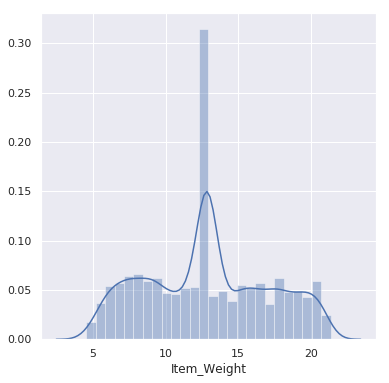

In [18]:
# Item_Weight distribution
plt.figure(figsize = (6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

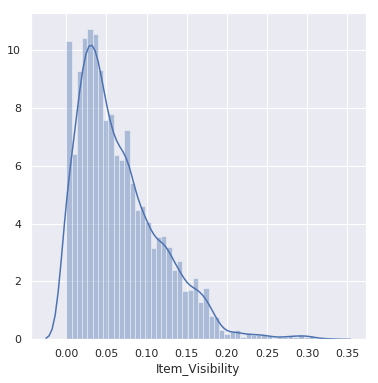

In [19]:
# Item_Weight visibility
plt.figure(figsize = (6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

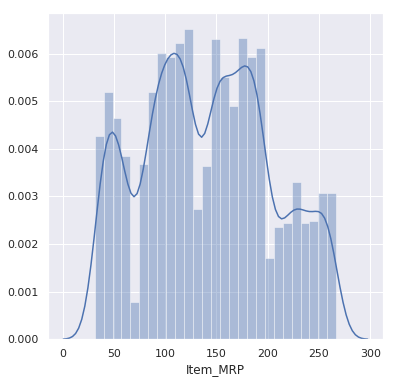

In [20]:
# Item_Weight MRP
plt.figure(figsize = (6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

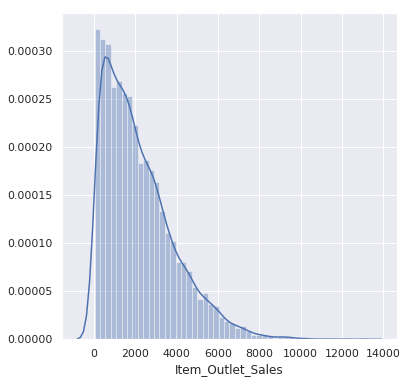

In [21]:
# Item_Outlet_Sales distribution
plt.figure(figsize = (6,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

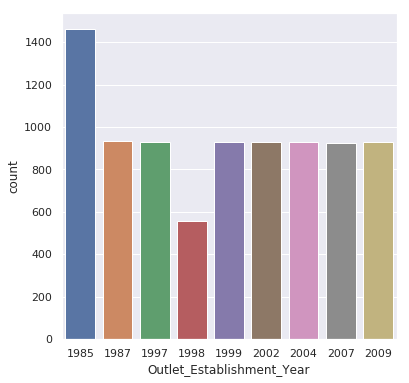

In [22]:
# Outlet_Establishment_Year column
plt.figure(figsize = (6,6))
sns.countplot(x = 'Outlet_Establishment_Year', data = big_mart_data)
plt.show()

# Categorical features

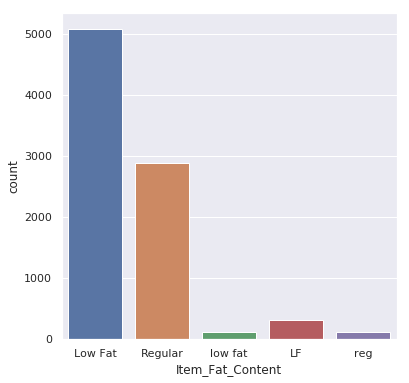

In [23]:
# Outlet_Establishment_Year column
plt.figure(figsize = (6,6))
sns.countplot(x = 'Item_Fat_Content', data = big_mart_data)
plt.show() # shows data must be cleaned

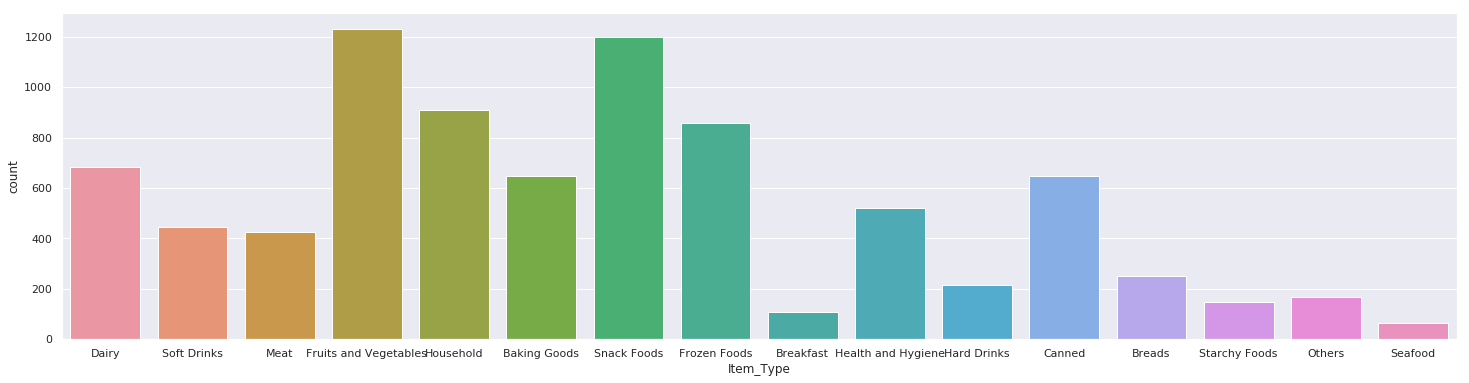

In [24]:
# Outlet_Establishment_Year column
plt.figure(figsize = (25,6))
sns.countplot(x = 'Item_Type', data = big_mart_data)
plt.show() # shows data must be cleaned

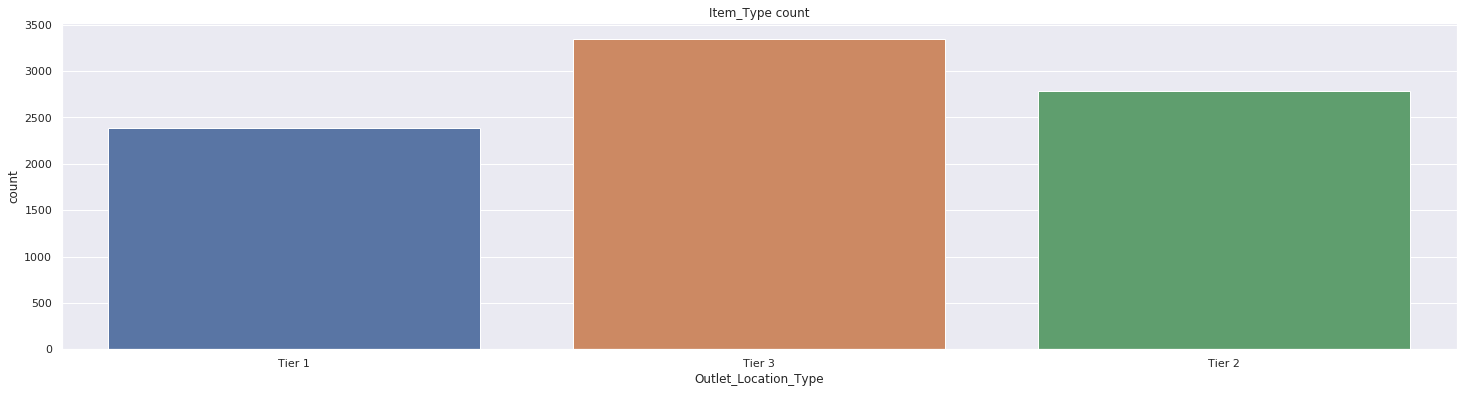

In [25]:
# Outlet_Location_Type column
plt.figure(figsize = (25,6))
sns.countplot(x = 'Outlet_Location_Type', data = big_mart_data)
plt.title("Item_Type count")
plt.show() # shows data must be cleaned

# Data pre-processing

In [26]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [28]:
big_mart_data.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [29]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Label encoding

Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [30]:
encoder = LabelEncoder()

In [31]:
big_mart_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [32]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])
big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])
big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])
big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])
# big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])
big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])
big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [33]:
big_mart_data.drop(['Outlet_Size'], axis=1, inplace=True)

## Splitting features and target

In [34]:
X = big_mart_data.drop(columns="Item_Outlet_Sales", axis=1)
Y = big_mart_data['Item_Outlet_Sales']

In [35]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156     9.300000                 0         0.016047   
1                   8     5.920000                 1         0.019278   
2                 662    17.500000                 0         0.016760   
3                1121    19.200000                 1         0.000000   
4                1297     8.930000                 0         0.000000   
5                 758    10.395000                 1         0.000000   
6                 696    13.650000                 1         0.012741   
7                 738    12.857645                 0         0.127470   
8                 440    16.200000                 1         0.016687   
9                 990    19.200000                 1         0.094450   
10               1171    11.800000                 0         0.000000   
11                147    18.500000                 1         0.045464   
12               1142    15.100000                 

## Split into train and test data

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 10) (6818, 10) (1705, 10)


In [38]:
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
Item_Identifier              8523 non-null int64
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null int64
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null int64
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null int64
Outlet_Establishment_Year    8523 non-null int64
Outlet_Location_Type         8523 non-null int64
Outlet_Type                  8523 non-null int64
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(7)
memory usage: 732.5 KB


## Machine model training. Use model = XGBoost regressor

In [39]:
regressor = XGBRegressor()

In [51]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

# Evaluate Model

In [52]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [53]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [54]:
print('R Squared value =',r2_train)

R Squared value = 0.8589562022805377


In [55]:
# prediction on testing data
test_data_prediction = regressor.predict(X_test)

In [56]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [57]:
print('R Squared value =',r2_test)

R Squared value = 0.5304668733144917


## r2_test very different from r2_train. The model might be overfitting